In [1]:
# Q1 : Develop a program that would use appropriate hand coded morphological operations to enhance the given fingerprint.png image as the resultant output image.

Text(0.5, 1.0, 'Erosion : Closing')

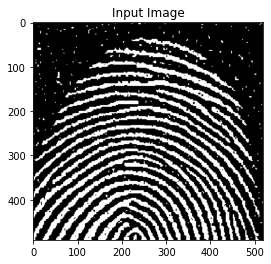

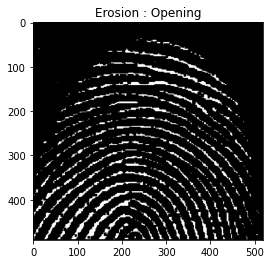

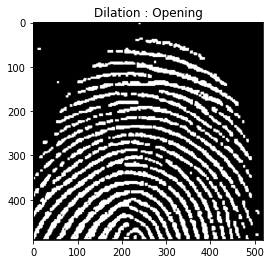

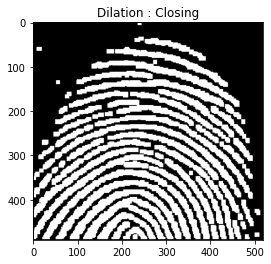

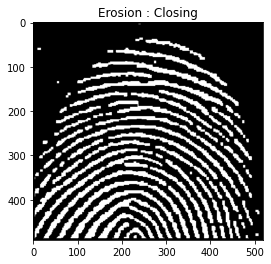

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


# Functions for erosion
def check_erode(A, B, k):
    for i in range(k):
        for j in range(k):
            if A[i,j]!=B[i,j]:
                return False
            
    return True

def erode(A, B, k):
    
    c = (k-1)//2
    
    # Shape of A
    x,y = A.shape
    
    #Define new  image
    new_img = np.zeros((x,y), dtype=np.uint8)
    
    for i in range(c, x-c):
        for j in range(c,y-c):
            temp = A[i-c:i+c+1, j-c:j+c+1]
            
            if check_erode(temp, B, k)==True:
                new_img[i,j] = 1
            else:
                new_img[i,j] = 0

    return new_img

    
# Functions for dilation
def check_dilate(A, B, k):
    for i in range(k):
        for j in range(k):
            if A[i,j]==B[i,j]:
                return True
            
    return False

def dilate(A, B, k):
    
    c = (k-1)//2
    
    # Shape of A
    x,y = A.shape
    
    #Define new  image
    new_img = np.zeros((x,y), dtype=np.uint8)
    
    for i in range(c, x-c):
        for j in range(c,y-c):
            temp = A[i-c:i+c+1, j-c:j+c+1]
            if check_dilate(temp, B, k):
                new_img[i,j] = 1
            else:
                new_img[i,j] = 0


    return new_img


# Reading the image of fingerprint
img_g = cv2.imread("fingerprint.png", 0)

# Converting greyscale image to binary using 128 as threshold
(thresh, img) = cv2.threshold(img_g, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img = img//255

# Shape of image
x,y = img.shape
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Input Image')

# Defining the structuring element of size (kxk)
k = 5
B = np.ones((k,k), dtype=np.uint8)

# Opening the image : Erosion followed by dilation
img3 = erode(img, B, k)
plt.figure()
plt.imshow(img3*255, cmap='gray')
plt.title('Erosion : Opening')

img4 = dilate(img3, B, k)
plt.figure()
plt.imshow(img4*255, cmap='gray')
plt.title('Dilation : Opening')

# Closing the image : Dilation followed by erosion
img5 = dilate(img4, B, k)
plt.figure()
plt.imshow(img5*255, cmap='gray')
plt.title('Dilation : Closing')

img6 = erode(img5, B, k)
plt.figure()
plt.imshow(img6*255, cmap='gray')
plt.title('Erosion : Closing')

In [3]:
# Q2. Implement a program to count the number of disks in the image disks.png, which has a number of touching black disks on a white background.

34 219
47 160
80 108
94 217
107 52
123 146
153 212
163 90
170 39
189 256
195 150
208 97
225 336
241 278
The number of objects present in image :  14


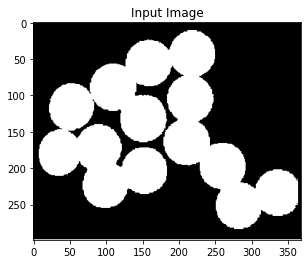

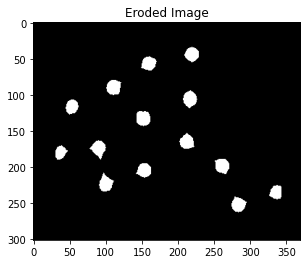

In [6]:
import cv2
import sys
from skimage.morphology import disk
import numpy as np
from queue import Queue
import matplotlib.pyplot as plt
%matplotlib inline

# np.set_printoptions(threshold=sys.maxsize)

def traverse(img, q, label):
    # While queue is not empty loop
    while not q.empty():
        # Get the element from queue
        list1 = q.get()
        x = list1[0]
        y = list1[1]
        
        # Loop for its 8 neighbours
        for i in range(x-1,x+2):
            for j in range(y-1, y+2):
                if not (i==x and j==y):
                    # If not labelled, add label and append to the queue
                    if img[i,j]==1 and label[i,j]==0:
                        label[i,j] = label[x,y]
                        list1 = [i, j]
                        q.put(list1)            # Append to queue
                        

def first_pass(img, label):
    # Shape of image
    x, y = img.shape
    
    # Current label number
    current_label = 1
    
    # Initializing queue
    q = Queue()
    
    # Loop for all elements in image
    for i in range(1, x-1):
        for j in range(1,y-1):
            # If an unlabelled white coloured element found
            if img[i,j]==1 and label[i,j]==0:
                # New unlabelled object starts
                label[i,j] = current_label
                list1 = [i, j]
                q.put(list1)            # Append to queue
                print(list1[0], list1[1])
                # Traverse to its neighbouring elements
                traverse(img, q, label)
                # Increment label number
                current_label = current_label + 1
     
    return current_label - 1
                    

# Reading the image of fingerprint
img_g = cv2.imread("disks.png", 0)

# Converting greyscale image to binary using 128 as threshold
(thresh, img) = cv2.threshold(img_g, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img = img//255
img = cv2.bitwise_not(img)

# Shape of image
x,y = img.shape
plt.figure()
plt.imshow(img, cmap='gray')
plt.title('Input Image')

# Creating disk shaped structuring element
radius = 22
mask = disk(radius)

# Eroding the image to separate disks
img_erosion = cv2.erode(img, mask, iterations=1)
(thresh, img_erosion) = cv2.threshold(img_erosion, 128, 255, cv2.THRESH_BINARY | cv2.THRESH_OTSU)
img_erosion = img_erosion//255

# Now pad the image
img_erosion = np.pad(img_erosion, pad_width=1, mode='constant',constant_values=0)
#print(img_erosion)
plt.figure()
plt.imshow(img_erosion, cmap='gray')
plt.title('Eroded Image')

# Defining label array
x, y = img_erosion.shape
label = np.zeros((x,y), dtype=np.uint8)

# Creating 1st pass over the image to label the objects
num_objects = first_pass(img_erosion, label)

print("The number of objects present in image : ", num_objects)

In [ ]:
# Q3. The task here is to help a robot to identify a bright orange ball in its surrounding. The ball.bmp is an image obtained from a camera mounted on the robot. 
# a) Implement a Myrgb2hsi function to convert red-green-blue (RGB) colors to hue saturation intensity (HSI). The function prototype should be: 
#       	function [H, S, I] = Myrgb2hsi(Im) 
#    where Im is the original color image, and H, S, and I are the normalized hue value, saturation-value, and intensity value in the HSI color space, 
#    respectively. That is, H, S, and I should be in the range of [0, 1]. Load and convert ball.bmp to HSI color space by calling the Myrgb2hsi function. 
#    Display the three images in figures 1 to 3 with the appropriate titles. Call an appropriate OpenCV/Matlab function to do the similar conversion and display 
#    the three images (i.e., Hue, Saturation, and Intensity) in figures 4 to 6 with appropriate titles. Display the difference images between your results and 
#    the Matlab’s results in figures 7 to 9 with appropriate titles. Explain the reason for these differences and the visual differences between your results and 
#    the Matlab’s results. 


(400, 600, 3)


([], [])

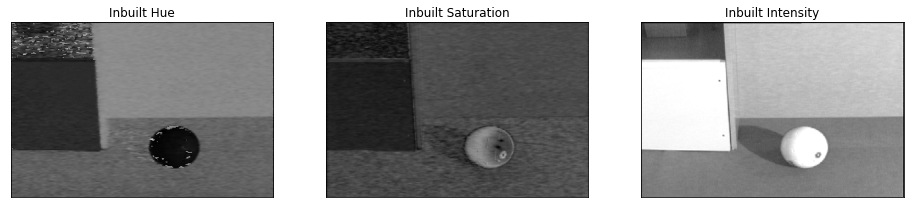

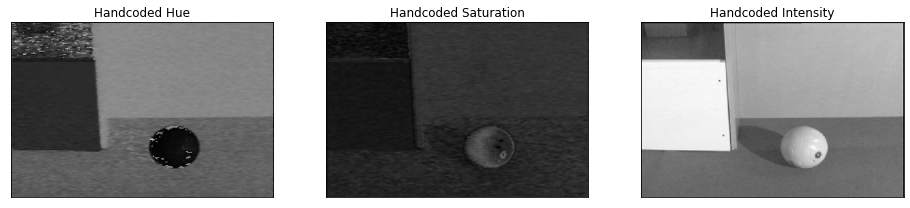

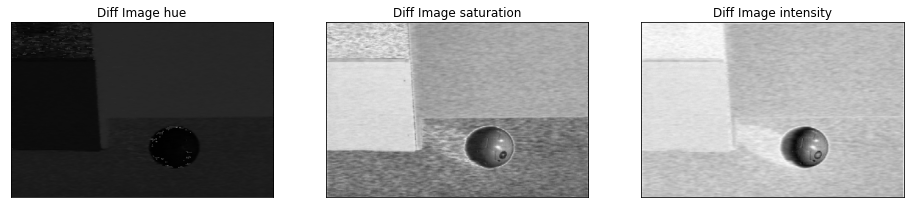

In [8]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

# Function to convert RGB to HSI
def Myrgb2hsi(img):
    
    # Converting 0-255 scale to 0-1 float
    img = img.astype('float32')
    img = img/255.0
    print(img.shape)
    
    # Shape of image
    x = img.shape[0]
    y = img.shape[1]

    # Split the image bands
    B = img[:,:,0]
    G = img[:,:,1]
    R = img[:,:,2]
    
    # Hue values
    H = np.zeros((x,y), dtype=np.float32)
    for i in range(x):
        for j in range(y):
            num = 0.5 * ((R[i][j] - G[i][j]) + (R[i][j] - B[i][j])) / \
                                math.sqrt((R[i][j] - G[i][j])**2 + ((R[i][j] - B[i][j]) * (G[i][j] - B[i][j])) + 0.00000000001)
            
            theta = math.acos(num)
            theta = math.degrees(theta)
            
            if B[i][j]<=G[i][j]:
                H[i][j] = theta
            else:
                H[i][j] = 360-theta
    # Normalise values for Hue
    H = H/360
    
    # Intensity
    I = (B+G+R)/3
    
    # Saturation
    S = np.zeros((x,y), dtype=np.float32)
    for i in range(x):
        for j in range(y):
            S[i][j] = 1 - ((3/(R[i][j]+G[i][j]+B[i][j]))*min(R[i][j],G[i][j],B[i][j]))
    

    return H,S,I
    
# Reading the image of ball
img = cv2.imread("ball.bmp")
HSI_img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
HSI_img = np.float32(HSI_img)/255

# Inbuilt functions for HSI of image
in_H = HSI_img[:,:,0]
in_S = HSI_img[:,:,1]
in_I = HSI_img[:,:,2]

# Plotting inbuilt HSI components
plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(in_H, cmap='gray')
plt.title("Inbuilt Hue")
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(in_S, cmap='gray')
plt.title("Inbuilt Saturation")
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(in_I, cmap='gray')
plt.title("Inbuilt Intensity")
plt.xticks([])
plt.yticks([])

# Finding HSI components of image
H, S, I = Myrgb2hsi(img)

# Plotting hand coded HSI components
plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(H, cmap='gray')
plt.title("Handcoded Hue")
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(S, cmap='gray')
plt.title("Handcoded Saturation")
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(I, cmap='gray')
plt.title("Handcoded Intensity")
plt.xticks([])
plt.yticks([])

#Plotting the difference in components

diff_I = I - in_I
diff_S = S - in_S
diff_H = H - in_H

plt.figure(figsize=(16,12))
plt.subplot(1,3,1)
plt.imshow(diff_H, cmap='gray')
plt.title('Diff Image hue')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,2)
plt.imshow(diff_S, cmap='gray')
plt.title('Diff Image saturation')
plt.xticks([])
plt.yticks([])

plt.subplot(1,3,3)
plt.imshow(diff_I, cmap='gray')
plt.title('Diff Image intensity')
plt.xticks([])
plt.yticks([])

In [21]:
#  Q3.b) In H-space, find a threshold for the ball. Find the centroid of the ball and indicate its location by a cross on the original color image.

([], [])

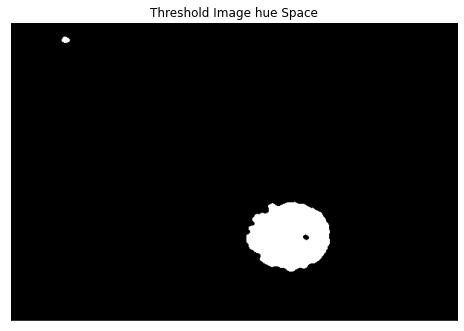

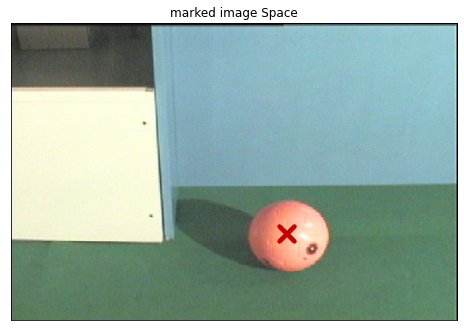

In [9]:
# Thresholding in Hue space

H = H/np.max(H)
H = H*255
H = H.astype('uint8')
ret,H = cv2.threshold(H,30,255,cv2.THRESH_BINARY_INV)

# plt.figure(figsize=(16,12))
# plt.subplot(1,3,1)
# plt.imshow(H, cmap='gray')
# plt.title('Threshold Image hue Space')
# plt.xticks([])
# plt.yticks([])


# Morphological Processing
element = cv2.getStructuringElement(cv2.MORPH_ELLIPSE,(7,7))
H = cv2.morphologyEx(H, cv2.MORPH_OPEN, element)
H = cv2.morphologyEx(H, cv2.MORPH_CLOSE, element)


# Centroid Calculation

M = cv2.moments(H)
cen_X = int(M["m10"] / M["m00"])
cen_Y = int(M["m01"] / M["m00"])

# Mark centroid on original image with red color cross
cv2.line(img, (cen_X-10, cen_Y-10), (cen_X+10, cen_Y+10), (0,0,200), 5)
cv2.line(img, (cen_X+10, cen_Y-10), (cen_X-10, cen_Y+10), (0,0,200), 5)

plt.figure(figsize=(8,6))
plt.imshow(H, cmap='gray')
plt.title('Threshold Image hue Space')
plt.xticks([])
plt.yticks([])

img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title('marked image Space')
plt.xticks([])
plt.yticks([])

In [2]:
# Q4. Develop a function to implement Harris corners detection algorithm. Use the function to detect corner points in the given corner_test.png image. 
# Compare the hand crafted function result with built in cv2.cornerHarris() function result to test your code.

3
Finding Corners...


([], [])

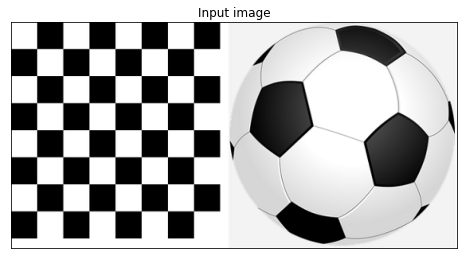

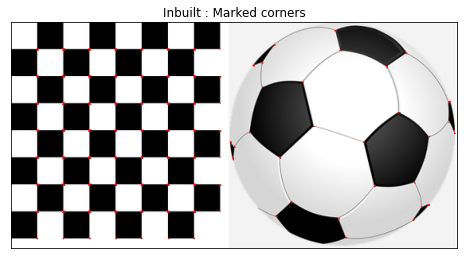

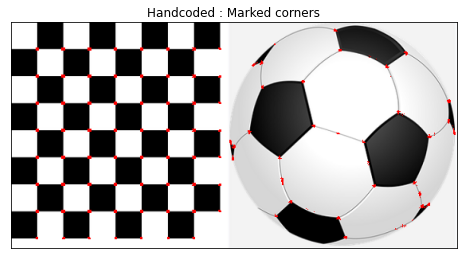

In [10]:
import cv2
import numpy as np
import math
import matplotlib.pyplot as plt
%matplotlib inline

def locate_corners(img, window_size, k, thresh):
    #Find x and y derivatives
    dy, dx = np.gradient(img)
    Ixx = dx**2
    Ixy = dy*dx
    Iyy = dy**2
    
    height = img.shape[0]
    width = img.shape[1]
    
    cornerList = []
    newImg = img.copy()
    color_img = cv2.cvtColor(newImg, cv2.COLOR_GRAY2RGB)
    offset = int(window_size/2)
    
    #Loop through image and find our corners
    print("Finding Corners...")
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            # Calculate sum of squares
            windowIxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            windowIyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            
            Sxx = windowIxx.sum()
            Sxy = windowIxy.sum()
            Syy = windowIyy.sum()

            # Find determinant and trace, use to get corner response
            det = (Sxx * Syy) - (Sxy**2)
            trace = Sxx + Syy
            
            # Response calculation
            r = det - (k*(trace**2))

            # If corner response is over threshold, color the point and add to corner list
            if r > thresh:
                cornerList.append((y, x))
    return cornerList

# Reading the image of chessboard and football
img_orig = cv2.imread("corner_test.png")
img = cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Input image")
plt.xticks([])
plt.yticks([])
print(len(img.shape))

# Inbuilt function
img_new = cv2.cvtColor(img_orig,cv2.COLOR_BGR2GRAY)
img_new = np.float32(img_new)
dst = cv2.cornerHarris(img_new,2,3,0.04)

# Threshold for an optimal value, it may vary depending on the image.
img_orig[dst > 0.01 * dst.max()] = [255, 0, 0]
plt.figure(figsize=(8,6))
plt.imshow(img_orig, cmap = 'gray')
plt.title("Inbuilt : Marked corners")
plt.xticks([])
plt.yticks([])

# Handcoded Harris Corner detection function

# Locate corners
corner_list = locate_corners(img_new,3,0.04,0.01 * dst.max())

# Marking corners
for each in corner_list:
    img[each[0],each[1],0] = 255
    img[each[0],each[1],1] = 0
    img[each[0],each[1],2] = 0

plt.figure(figsize=(8,6))
plt.imshow(img)
plt.title("Handcoded : Marked corners")
plt.xticks([])
plt.yticks([])


In [ ]:
# Q5

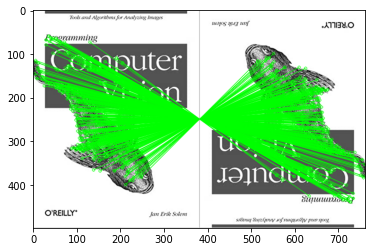

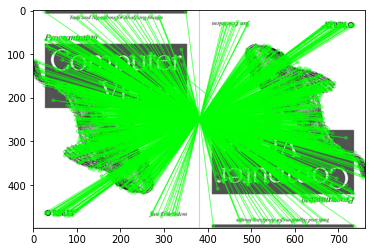

(<matplotlib.image.AxesImage at 0xda93150>, None)

In [7]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import random

MIN_MATCH_COUNT = 10

img1 = cv2.imread('FM_img1.jpg',0)          # Query Image
img2 = cv2.imread('FM_img2.jpg',0)          # Training Image

# Initiating SIFT detector
sift = cv2.SIFT_create()

# Finding the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1,None)
kp2, des2 = sift.detectAndCompute(img2,None)

FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks = 50)

# Matching using Flann
flann = cv2.FlannBasedMatcher(index_params, search_params)

matches = flann.knnMatch(des1,des2,k=2)

# Storing all the good matches as per Lowe's ratio test.
good = []
for m,n in matches:
    if m.distance < 0.7*n.distance:
        good.append(m)

src_pts = np.float32([ kp1[m.queryIdx].pt for m in good ])
dst_pts = np.float32([ kp2[m.trainIdx].pt for m in good ])

# RANSAC 

best_affine = None
max_inliers_so_far = -1
threshold_error = 0.01

for i in range(17):
    inliers = 0
    
    # Choosing any 3 points
    rand_idx = random.choices(range(len(src_pts)), k=3)
    rand_src = [src_pts[rand_idx[0]],src_pts[rand_idx[1]],src_pts[rand_idx[2]]]
    
    rand_dst = [dst_pts[rand_idx[0]],dst_pts[rand_idx[1]],dst_pts[rand_idx[2]]]
    
    # Estimating transformation matrix
    affine_t = cv2.getAffineTransform(np.float32(rand_src),np.float32(rand_dst))
    
    matchesMask = [0]*len(src_pts)
    
    for i in range(len(src_pts)):
        
        extended = np.hstack((src_pts[i],1))
        prod = np.matmul(affine_t,extended)
        
        # Finding squared error
        err = sum((prod -dst_pts[i])**2)
        
        # Inlier if error < threshold
        if err<threshold_error:
            inliers+=1
            matchesMask[i] = 1
        else:
            matchesMask[i] = 0
        
        # Break if max number of inliers found
        if inliers>int(0.50*len(src_pts)):
        
            break
        
    
    
draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   matchesMask = matchesMask,
                   flags = 2)


img3 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)

plt.imshow(img3, 'gray'),plt.show()

draw_params = dict(matchColor = (0,255,0), # draw matches in green color
                   singlePointColor = None,
                   flags = 2)


img4 = cv2.drawMatches(img1,kp1,img2,kp2,good,None,**draw_params)


plt.imshow(img4, 'gray'),plt.show()
        
        
